1. Run a Linear Discriminant Analysis based on quantitative environmental variables (see previous
exercises), using the Douro and Tejo basins as the pre-determined groups. Produce a biplot with
‘Catchment_name’ as a grouping variable. 

In [1]:
#importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import  euclidean_distances

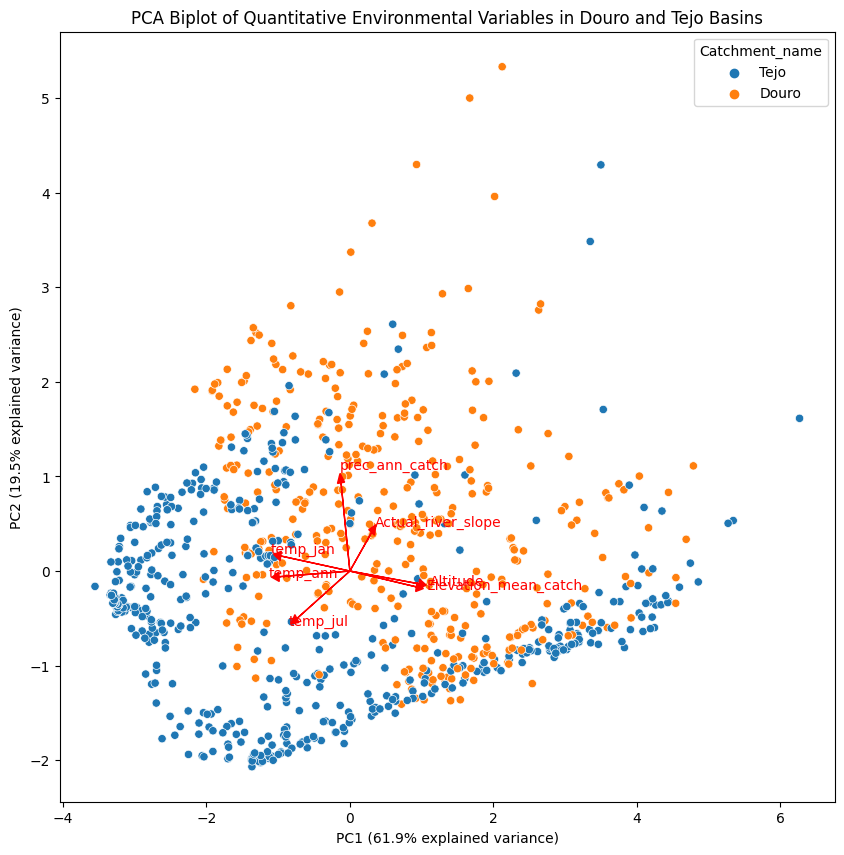

In [3]:
#ler base de dados
df1 = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
df = df1[(df1['Catchment_name'] == 'Tejo') | (df1['Catchment_name'] == "Douro")]

#colunas
columns = ['Catchment_name', 'Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
df = df[columns]

df = df.dropna()
df = df.reset_index(drop = True)

# Subset
subset = df.drop("Catchment_name", axis=1)

# Standardize
data_std = StandardScaler().fit_transform(subset)

# PCA
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(data_std)
pca_df = pd.DataFrame(data=pca_fit, columns=["PC1", "PC2"])

# Biplot
fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(x="PC1", y="PC2", hue=df["Catchment_name"], data=pca_df, ax=ax)

variables = pca.components_.T * np.sqrt(pca.explained_variance_)
variable_labels = subset.columns

for i, v in enumerate(variables):
    ax.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1, color="r")
    ax.text(v[0]*1.15, v[1]*1.15, variable_labels[i], color="r")

ax.set_xlabel("PC1 ({:.1f}% explained variance)".format(pca.explained_variance_ratio_[0]*100))
ax.set_ylabel("PC2 ({:.1f}% explained variance)".format(pca.explained_variance_ratio_[1]*100))
ax.set_title("PCA Biplot of Quantitative Environmental Variables in Douro and Tejo Basins")
plt.show()

2. Try to build interactive plots that display data in the space defined by the Discriminant Functions.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [10]:
# pairwise scatter plots
features = ["Altitude", "Actual_river_slope", "Elevation_mean_catch", "prec_ann_catch", "temp_ann", "temp_jan", "temp_jul"]

fig = px.scatter_matrix(
    df,
    dimensions=features,
    color="Catchment_name",
    width=800, height=700
)

fig.update_traces(diagonal_visible=False)
fig.show()